<a href="https://colab.research.google.com/github/Dhivya-kuppusamy/Machine-learning/blob/main/animal_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

# Upload the Kaggle API key (kaggle.json) that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pip install kaggle

In [8]:
!kaggle datasets download -d antobenedetti/animals

100% 878M/882M [00:08<00:00, 143MB/s]
100% 882M/882M [00:08<00:00, 113MB/s]


In [9]:
!unzip -q animals.zip

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
from zipfile import ZipFile
from tqdm import tqdm

In [12]:
import os
data_dir = "/content/animals"


In [13]:
from pathlib import Path

# Specify the path to your dataset
data_dir = "/content/animals"  # Adjust the path accordingly

# Convert the string path to a Path object
data_dir_path = Path(data_dir)

# Check if the directory exists
if data_dir_path.exists():
    print(f"Dataset is located at: {data_dir}")

    # Use the Path object to perform operations
    image_count = len(list(data_dir_path.glob('*/*.jpg')))
    print(image_count)

else:
    print(f"The specified directory '{data_dir}' does not exist.")


Dataset is located at: /content/animals
5


In [15]:
from pathlib import Path

data_dir = Path("/content/animals")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


5


In [21]:
 inf= list(data_dir.glob('inf/*'))


In [22]:
inf[0]

PosixPath('/content/animals/inf/elephant.jpg')

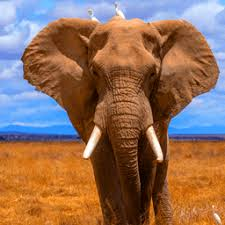

In [24]:
PIL.Image.open(str(inf[0]))

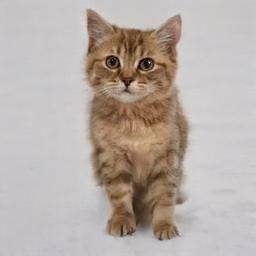

In [25]:
PIL.Image.open(str(inf[1]))

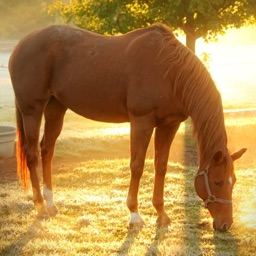

In [30]:
horse = list(data_dir.glob('inf/*'))
PIL.Image.open(str(inf[4]))

In [31]:
batch_size = 32
img_height = 224
img_width = 224

In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 14976 files belonging to 3 classes.
Using 11981 files for training.


In [33]:
data_dir

PosixPath('/content/animals')

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14976 files belonging to 3 classes.
Using 2995 files for validation.


In [35]:
class_names = train_ds.class_names
print(class_names)

['inf', 'train', 'val']


In [36]:
for images, labels in train_ds.take(1):
  print(labels)

tf.Tensor([2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)


In [37]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
i = 0
for images, labels in train_ds.take(1):
  print(labels)
  # print(images)
  for l in labels:
    print(i)
    i += 1


tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


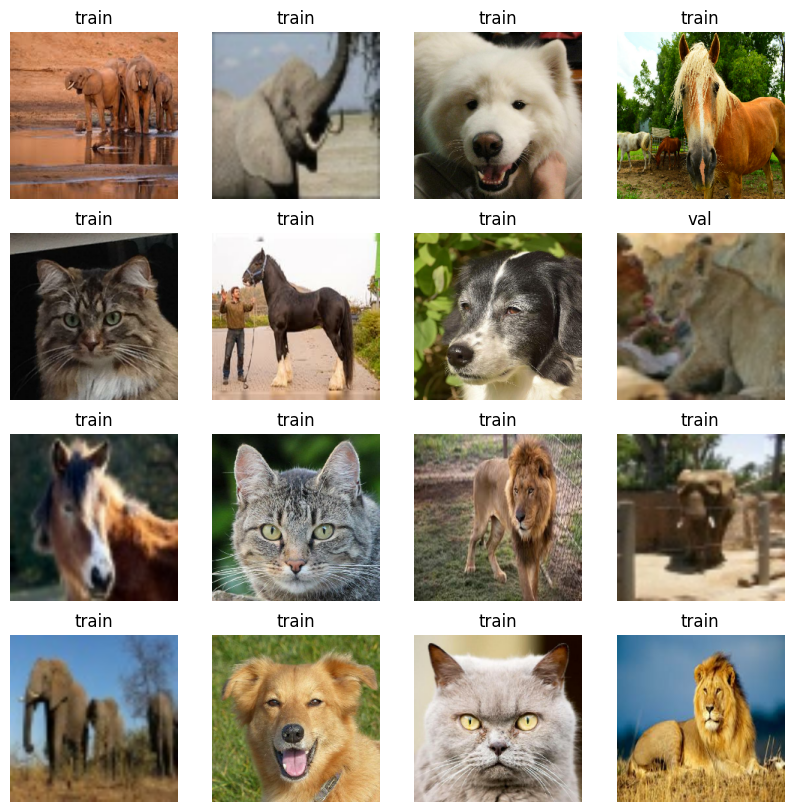

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [40]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch)
  break

(32, 224, 224, 3)
(32,)
tf.Tensor([1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1], shape=(32,), dtype=int32)


In [41]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [45]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
375/375 [==============================] - 723s 2s/step - loss: 0.3494 - accuracy: 0.8978 - val_loss: 0.3265 - val_accuracy: 0.9068
Epoch 2/10
375/375 [==============================] - 684s 2s/step - loss: 0.3329 - accuracy: 0.8979 - val_loss: 0.3056 - val_accuracy: 0.9068
Epoch 3/10
375/375 [==============================] - 636s 2s/step - loss: 0.3245 - accuracy: 0.8980 - val_loss: 0.3108 - val_accuracy: 0.9062
Epoch 4/10
375/375 [==============================] - 657s 2s/step - loss: 0.3097 - accuracy: 0.8996 - val_loss: 0.3052 - val_accuracy: 0.9055
Epoch 5/10
375/375 [==============================] - 661s 2s/step - loss: 0.2912 - accuracy: 0.9041 - val_loss: 0.3078 - val_accuracy: 0.9085
Epoch 6/10
375/375 [==============================] - 662s 2s/step - loss: 0.2658 - accuracy: 0.9109 - val_loss: 0.3351 - val_accuracy: 0.9062
Epoch 7/10
375/375 [==============================] - 662s 2s/step - loss: 0.2307 - accuracy: 0.9219 - val_loss: 0.3990 - val_accuracy: 0.9068

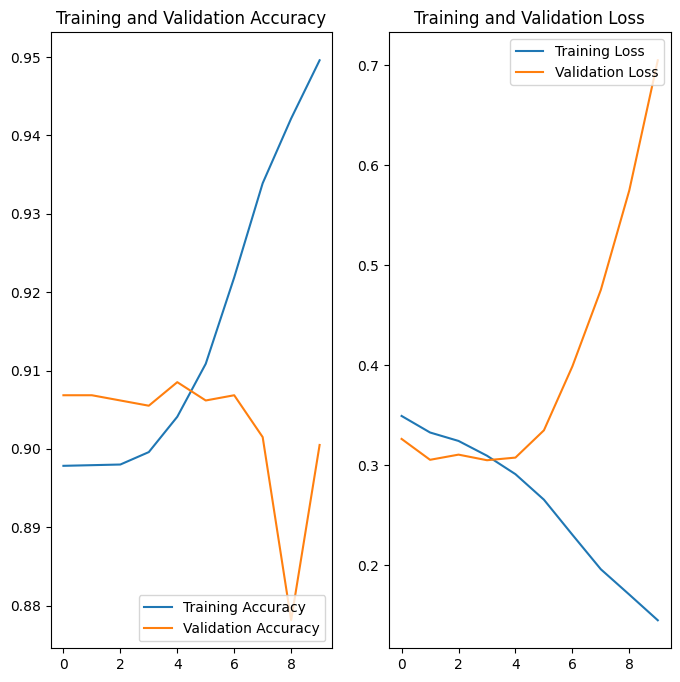

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1/1 [==============================] - 1s 772ms/step
[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[27  1]
 [ 4  0]]


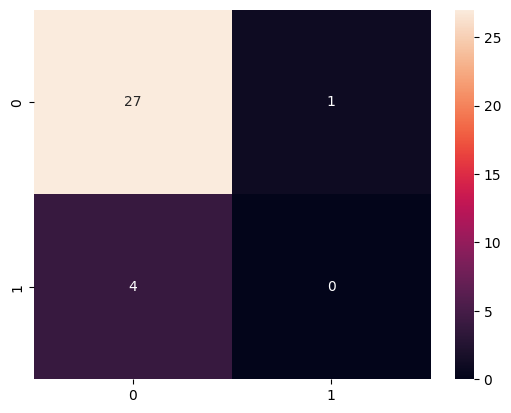

In [48]:
for d, y in val_ds.take(1):
  y_pred = np.argmax(model.predict(d), axis=1)
  print(y_pred)
  cf_matrix = confusion_matrix(y, y_pred)
  print(cf_matrix)
  sns.heatmap(cf_matrix, annot=True)

1/1 [==============================] - 1s 1s/step
[1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
[[27  0]
 [ 2  3]]


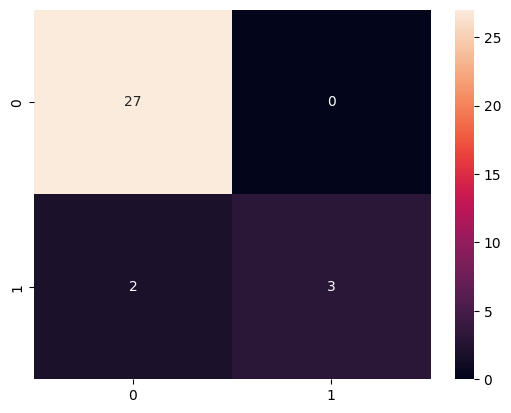

In [49]:
for d, y in train_ds.take(1):
  y_pred = np.argmax(model.predict(d), axis=1)
  print(y_pred)
  cf_matrix = confusion_matrix(y, y_pred)
  print(cf_matrix)
  sns.heatmap(cf_matrix, annot=True)